In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload

import acquire as a 
import prepare as p
import explore as e

from scipy import stats

In [2]:
df = a.acquire_readmes()

In [3]:
df = p.prep_df_for_nlp(df,'readme_contents',extra_words=p.EXTRA_WORDS)

In [4]:
train, validate, test = p.split_data(df, 'language')

In [5]:
train

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
482,awesome-actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome curated awesome things...,awesom action awesom curat awesom thing relat ...,awesome action awesome curated awesome thing r...,sdras,17459
646,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,834
474,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 srchttps gith...,osqueri altosqueri logo width200 srchttp githu...,osquery altosquery logo width200 srchttps gith...,osquery,3181
545,Best-App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3754
539,actix-web,Other,actix-web/README.md,actixweb readme.md,actixweb readme.md,actixweb readme.md,actix,18
...,...,...,...,...,...,...,...,...
47,sly,JavaScript,# [Sly](http://darsa.in/sly)\n\nJavaScript lib...,sly javascript library onedirectional scrollin...,sli javascript librari onedirect scroll item b...,sly javascript library onedirectional scrollin...,darsain,1304
268,free,Not Listed,更新时间 2023-01-12 00:00 \n所有免费节点都爬取自网络，请勿用于非法用途...,20230112 0000 android windows v2ray v2rayng v2...,20230112 0000 android window v2ray v2rayng v2r...,20230112 0000 android window v2ray v2rayng v2r...,freefq,13158
230,hello-algorithm,Java,## 简介\n\nEnglish version repo and Gitbook is o...,english repo gitbook english branch part1 part...,english repo gitbook english branch part1 part...,english repo gitbook english branch part1 part...,geekxh,704
304,jq,Other,README.md,readme.md,readme.md,readme.md,stedolan,9


In [6]:
train.username.value_counts()

microsoft           10
google               4
facebook             4
angular              3
facebookresearch     3
                    ..
mtdvio               1
FredrikNoren         1
openai               1
pcottle              1
stedolan             1
Name: username, Length: 413, dtype: int64

In [7]:
train[train.username == 'google'].language.value_counts()

Go            1
Java          1
Not Listed    1
Other         1
JavaScript    0
Python        0
TypeScript    0
Name: language, dtype: int64

## Does the length of the README indicate the main programming language?

In [8]:
pd.DataFrame(train.groupby('language').lemmatized_len.mean())

,lemmatized_len
language,
Go,5796.578947
Java,2620.972973
JavaScript,6930.531915
Not Listed,12022.097561
Other,5221.312925
Python,10335.891304
TypeScript,3391.875000


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='language', ylabel='lemmatized_len'>

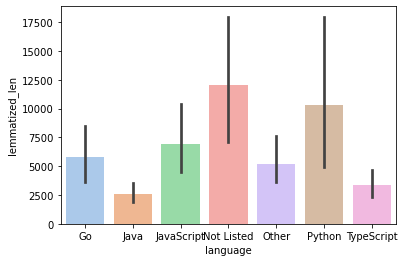

In [10]:
sns.barplot(x="language", y="lemmatized_len", data=train, palette='pastel')

In [11]:
go, java, javascript, not_listed, other, python, typescript = e.split_by_language(train)

In [12]:
stat, p = stats.kruskal(go.lemmatized_len, java.lemmatized_len, javascript.lemmatized_len, not_listed.lemmatized_len, other.lemmatized_len, python.lemmatized_len, typescript.lemmatized_len)

In [13]:
e.p_to_md(p)

## Because $\alpha$ > p,we  reject $H_0$

## Does the name of the programming language appearing in the README indicate the main programming language?

In [67]:
# Only 
js_js= train.language =='JavaScript'

In [68]:
all_js = train.lemmatized.str.contains('javascript')

In [70]:
js_ctab = pd.crosstab(js_js, all_js)

In [71]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [72]:
p

1.2887102375992508e-07

In [19]:
# Only 
python_python =train.language =='Python'

In [20]:
all_python = train.lemmatized.str.contains('python')

In [21]:
ctab = pd.crosstab(python_python, all_python)

In [22]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [23]:
p

9.234695818751059e-22

### Go NOT significant no need to encode

In [24]:
# Only 
gogo = train.language == 'Go'

In [25]:
all_go = train.lemmatized.str.contains('go')

In [26]:
ctab = pd.crosstab(gogo, all_go)

In [27]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [28]:
p

0.00473035534974974

In [29]:
# Only 
typescript_typescript = train.language == 'TypeScript'

In [30]:
all_typescript = train.lemmatized.str.contains('typescript')

In [31]:
ctab = pd.crosstab(typescript_typescript, all_typescript)

In [32]:
stat, p, degf, expected = stats.chi2_contingency(ctab)

In [33]:
p

1.2887102375992508e-07

In [34]:
javascript_words_freq = e.get_ngram_frequency(javascript.lemmatized)
python_words_freq = e.get_ngram_frequency(python.lemmatized)
typescript_words_freq = e.get_ngram_frequency(typescript.lemmatized)
go_words_freq = e.get_ngram_frequency(go.lemmatized)
other_series_freq = e.get_ngram_frequency(other.lemmatized)
not_listed_freq = e.get_ngram_frequency(not_listed.lemmatized)
java_words_freq = e.get_ngram_frequency(java.lemmatized)
all_words_freq = e.get_ngram_frequency(train.lemmatized)

In [54]:
word_counts = (pd.concat([all_words_freq, javascript_words_freq,typescript_words_freq,go_words_freq, python_words_freq, java_words_freq, other_series_freq, not_listed_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript','typescript','go', 'python', 'java','other','not_listed'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
word_counts_limited = word_counts[(word_counts.index=='javascript') | (word_counts.index=='python') | (word_counts.index=='typescript') | (word_counts.index=='go') | (word_counts.index=='java')]


,all,javascript,typescript,go,python,java,other,not_listed
.,1,0,0,0,0,0,1,0
..,534,136,13,72,146,28,113,26
...,116,54,1,5,22,7,16,11
....,45,7,2,6,28,0,2,0
.....,9,1,0,2,0,3,3,0
......,7,0,0,0,7,0,0,0
........,1,0,0,0,1,0,0,0
.........,1,0,0,0,1,0,0,0
..........,1,0,0,0,1,0,0,0
...........,1,0,0,0,1,0,0,0


In [97]:
word_counts_limited

,all,javascript,typescript,go,python,java,other,not_listed
go,428,38,15,200,25,11,90,49
java,282,4,1,6,11,82,95,83
javascript,629,464,33,6,10,3,52,61
python,610,16,1,9,403,7,111,63
typescript,129,39,53,2,0,2,24,9


ValueError: pride is not a valid palette name

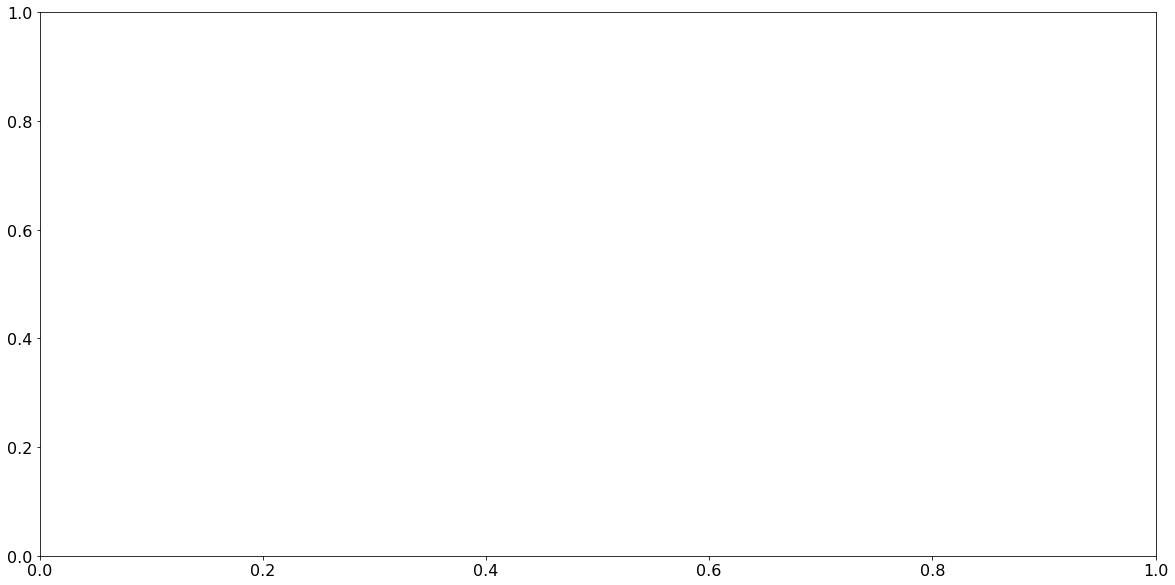

In [64]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
plt.rcParams.update({'font.size': 16})

(word_counts_limited.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by='javascript')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False, ax=ax, color=sns.color_palette('pride'))
)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=7, fancybox=True, shadow=True)
ax.set_xlim(0,1)
plt.show()

In [78]:
def title_chi2(df, word):
    lang = df.language
    has_word = df.repo.str.contains(word)
    ctab = pd.crosstab(lang, has_word)
    stat, p, degf, expected = stats.chi2_contingency(ctab)
    return p_to_md(p)

In [79]:
title_chi2(train, 'go')

## Because $\alpha$ > p,we  reject $H_0$

In [95]:
def language_name_chi2(df, lang):
    series = df.language == lang
    has_word = df.lemmatized.str.contains(lang.lower())
    ctab = pd.crosstab(series, has_word)
    stat, p, degf, expected = stats.chi2_contingency(ctab)
    return e.p_to_md(p)

In [96]:
language_name_chi2(train, 'JavaScript')

## Because $\alpha$ > p,we  reject $H_0$